Za Text Mining analizu, skinut je mini twitter dataset sa websajta 

https://www.trackmyhashtag.com

isfiltriran hastagom #happiness, koji ce nam dati uvid u kom procentu je prisutan hashtag HAPPINESS odnosno postavljamo PITANJE: DA LI SE REC SRECA VEZUJE ZA EKONOMIJU(GDP) tj. NOVAC?!

**2076 *** Money cannot buy HAPPINESS***jedna od tweet poruka iz seta***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
plt.style.use('fivethirtyeight')

Load the data

In [ ]:
tweets = pd.read_csv('/content/drive/My Drive/happy-tweets.csv')

In [ ]:
tweets.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1359065517147840513,"if you truly want happiness, let go of the pas...",gabriel ⚡️,itsgabrielyuh,2021-02-09T09:04:04.000Z,Tue Feb 09 09:04:04 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,1359065513016631297,RT @HudaTVChannel : YA ALLAH ! Give Our mother...,tahir,binnadar87,2021-02-09T09:04:03.000Z,Tue Feb 09 09:04:03 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,photo,https://pbs.twimg.com/media/EtwVdhkWQAEoqWt.jpg,NaN,NaN,NaN
2,1359065512479608833,RT @irubinadilaik : Is it true guys?\n\nWe ach...,Sabu,Sabu99613475,2021-02-09T09:04:03.000Z,Tue Feb 09 09:04:03 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
3,1359065511351357440,RT @Kailash46280213 : I love u \n@ashukla09 so...,Abhishek Sharma,Abhishe65396058,2021-02-09T09:04:02.000Z,Tue Feb 09 09:04:02 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,1,NaN,NaN,NaN,NaN,NaN
4,1359065511309447175,RT @Priti75386701 : Is it true guys?\n\nWe ach...,Vikash Raj,VikashR61739797,2021-02-09T09:04:02.000Z,Tue Feb 09 09:04:02 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet Id     2080 non-null   int64 
 1   Text         2080 non-null   object
 2   Name         2080 non-null   object
 3   Screen Name  2080 non-null   object
 4   UTC          2080 non-null   object
 5   Created At   2080 non-null   object
 6   Favorites    2080 non-null   int64 
 7   Retweets     2080 non-null   int64 
 8   Language     2080 non-null   object
 9   Client       2079 non-null   object
 10  Tweet Type   2080 non-null   object
 11  URLs         160 non-null    object
 12  Hashtags     2080 non-null   int64 
 13  Mentions     2080 non-null   int64 
 14  Media Type   771 non-null    object
 15  Media URLs   771 non-null    object
 16  Unnamed: 16  268 non-null    object
 17  Unnamed: 17  140 non-null    object
 18  Unnamed: 18  61 non-null     object
dtypes: int64(5), object(14)
mem

In [ ]:
tweets.describe()

,Tweet Id,Favorites,Retweets,Hashtags,Mentions
count,2.080000e+03,2080.000000,2080.000000,2080.000000,2080.000000
mean,1.359063e+18,0.141827,0.044231,0.638462,0.605769
std,1.259634e+12,1.377194,0.483459,1.755651,2.685605
min,1.359061e+18,0.000000,0.000000,0.000000,0.000000
25%,1.359062e+18,0.000000,0.000000,0.000000,0.000000
50%,1.359063e+18,0.000000,0.000000,0.000000,0.000000
75%,1.359064e+18,0.000000,0.000000,1.000000,1.000000
max,1.359066e+18,50.000000,17.000000,31.000000,50.000000


In [ ]:
tweets.columns

Index(['Tweet Id', 'Text', 'Name', 'Screen Name', 'UTC', 'Created At',
       'Favorites', 'Retweets', 'Language', 'Client', 'Tweet Type', 'URLs',
       'Hashtags', 'Mentions', 'Media Type', 'Media URLs', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

izbrisali smo nepotrebne kolone i ostavili samo onu koja se tice twitter postova (texta)


In [ ]:
tweets = tweets.drop(columns={'Tweet Id','Name', 'Screen Name', 'Language', 'Client', 'Tweet Type', 'URLs', 'Mentions', 'Media Type', 'Media URLs', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Created At', 'Favorites', 'UTC', 'Hashtags', 'Retweets'})

In [ ]:
tweets.columns

Index(['Text'], dtype='object')

In [ ]:
tweets.columns = ['Tweet']

In [ ]:
tweets.head()

,Tweet
0,"if you truly want happiness, let go of the pas..."
1,RT @HudaTVChannel : YA ALLAH ! Give Our mother...
2,RT @irubinadilaik : Is it true guys?\n\nWe ach...
3,RT @Kailash46280213 : I love u \n@ashukla09 so...
4,RT @Priti75386701 : Is it true guys?\n\nWe ach...


Clean the text in Tweet posts
tako sto cemo kreirati funkciju kojom se uklanjaju posebni simboli i mentions u samom tekstu:    
    remove urls
    remove special chars
    remove @mentions and #hashtag
    remove html tags
    


In [ ]:
def cleanTxt(text):
  text = re.sub(r"@[A-Za-z0-9]+", " ", text, flags=re.MULTILINE) #removed mentions
  text = re.sub(r"#", " ", text, flags=re.MULTILINE) #removing the '#' symbol
  text = re.sub(r"[RT\s]+", " ",text, flags=re.MULTILINE) #removing RT
  text = re.sub(r"https*\S+", " ",text, flags=re.MULTILINE) #remove hyperlinks
  text = re.sub(r":", " ", text, flags=re.MULTILINE) #removing the ':' symbol

  #text = ''.join(re.sub("(@[A-Za-z0–9]+)|([⁰-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())

  return text

  #cleaning the text
  tweets['Tweet'] = tweets['Tweet'].apply(cleanTxt)

In [ ]:
#show the cleaned text
tweets

,Tweet
0,"if you truly want happiness, let go of the pas..."
1,": YA ALLAH ! Give Our mothers, sisters and da..."
2,: Is it true guys? We achieved 15M!!!! I can'...
3,: I love u so much the 1st indian celebrity w...
4,: Is it true guys? We achieved 15M!!!! I can'...
...,...
2075,: Is it true guys? We achieved 15M!!!! I can'...
2076,@_ayeshaxoxo : “MONEY CAN’ BUY HAPPINESS” IS ...
2077,_4Fans : Happiness is a sweet babboo 💗
2078,": he is exactly what I said yesterday, Occupy..."


In [ ]:
  tweets['Tweet'] = tweets['Tweet'].apply(cleanTxt)

In [ ]:
tweets

,Tweet
0,"if you truly want happiness, let go of the pas..."
1,"YA ALLAH ! Give Our mothers, sisters and da..."
2,Is it true guys? We achieved 15M!!!! I can'...
3,I love u so much the 1st indian celebrity w...
4,Is it true guys? We achieved 15M!!!! I can'...
...,...
2075,Is it true guys? We achieved 15M!!!! I can'...
2076,@_ayeshaxoxo “MONEY CAN’ BUY HAPPINESS” IS ...
2077,_4Fans Happiness is a sweet babboo 💗
2078,"he is exactly what I said yesterday, Occupy..."


Create a functions to get Subjectivity and Polarity, then add 2 more columns

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

tweets['Subjectivity'] = tweets['Tweet'].apply(getSubjectivity)
tweets['Polarity'] = tweets['Tweet'].apply(getPolarity)

In [ ]:
tweets

,Tweet,Subjectivity,Polarity
0,"if you truly want happiness, let go of the pas...",0.191667,0.150000
1,"YA ALLAH ! Give Our mothers, sisters and da...",0.433333,0.633333
2,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746
3,I love u so much the 1st indian celebrity w...,0.340000,0.508333
4,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746
...,...,...,...
2075,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746
2076,@_ayeshaxoxo “MONEY CAN’ BUY HAPPINESS” IS ...,0.200000,0.875000
2077,_4Fans Happiness is a sweet babboo 💗,0.425000,0.525000
2078,"he is exactly what I said yesterday, Occupy...",0.225000,0.475000


In [ ]:
  tweets['Tweet'].apply(cleanTxt)

0       if you truly want happiness, let go of the pas...
1        YA ALLAH ! Give Our mothers, sisters and daug...
2        Is it true guys? We achieved 15M!!!! I can't ...
3        I love u so much the 1st indian celebrity who...
4        Is it true guys? We achieved 15M!!!! I can't ...
                              ...                        
2075     Is it true guys? We achieved 15M!!!! I can't ...
2076     @_ayeshaxoxo “MONEY CAN’ BUY HAPPINESS” IS A ...
2077                _4Fans Happiness is a sweet babboo 💗 
2078     he is exactly what I said yesterday, OccupyLe...
2079     Yessssssssssss....... ears of happiness '( DE...
Name: Tweet, Length: 2080, dtype: object

plot the Word Cloud

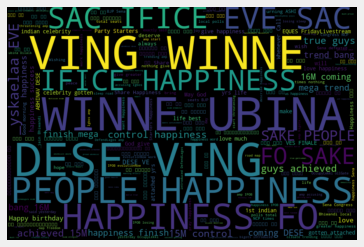

In [ ]:
allWords = ' '.join( [twts for twts in tweets['Tweet']] )
wordCloud = WordCloud(width=900, height=600, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

function in order to get info on positive, negative and neutral analysis

In [ ]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

tweets['Analysis'] = tweets['Polarity'].apply(getAnalysis)

#show the dataFrame
tweets

,Tweet,Subjectivity,Polarity,Analysis
0,"if you truly want happiness, let go of the pas...",0.191667,0.150000,Positive
1,"YA ALLAH ! Give Our mothers, sisters and da...",0.433333,0.633333,Positive
2,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746,Positive
3,I love u so much the 1st indian celebrity w...,0.340000,0.508333,Positive
4,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746,Positive
...,...,...,...,...
2075,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746,Positive
2076,@_ayeshaxoxo “MONEY CAN’ BUY HAPPINESS” IS ...,0.200000,0.875000,Positive
2077,_4Fans Happiness is a sweet babboo 💗,0.425000,0.525000,Positive
2078,"he is exactly what I said yesterday, Occupy...",0.225000,0.475000,Positive


Da bi dosli do procenta +,- i 0 tvitova:

ukupan broj pozitivnih tvitova, delimo sa ukupnim brojem tvitova i da bi dosli do procenta - mnozimo sa 100:

In [ ]:
ptweets = tweets[tweets.Analysis == 'Positive']
ptweets = ptweets['Tweet']

ptweets

0       if you truly want happiness, let go of the pas...
1          YA ALLAH ! Give Our mothers, sisters and da...
2          Is it true guys? We achieved 15M!!!! I can'...
3          I love u so much the 1st indian celebrity w...
4          Is it true guys? We achieved 15M!!!! I can'...
                              ...                        
2075       Is it true guys? We achieved 15M!!!! I can'...
2076     @_ayeshaxoxo   “MONEY CAN’ BUY HAPPINESS” IS ...
2077              _4Fans   Happiness is a sweet babboo 💗 
2078       he is exactly what I said yesterday, Occupy...
2079       Yessssssssssss....... ears of happiness  '(...
Name: Tweet, Length: 1960, dtype: object

In [ ]:
round( (ptweets.shape[0]/tweets.shape[0]) * 100, 1)

94.2

plot subjectivity and polarity

In [ ]:
ntweets = tweets[tweets.Analysis == 'Negative']
ntweets = ntweets['Tweet']

round( (ntweets.shape[0]/tweets.shape[0]) * 100,1)

1.1

<function matplotlib.pyplot.show>

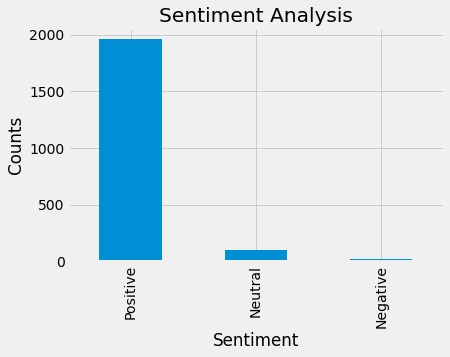

In [ ]:
#Show the value_counts

tweets['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis'].value_counts().plot(kind='bar')
plt.show

TFIDF VECTOR

konvertovanje teksta u numericke podatke, kako bi mogli da primenimo neki ML model, jer ML algoritam razume samo numerical DATA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

prvo cemo transformisati kolonu  Analysis kolonu, a potom i tweets, da bi mogli da primenimo ML model




In [ ]:

def getSentiment(sentiment):
  for i in tweets.Analysis:
   if (i == 'Positive'):
     return 1   
   else:
     return 0

tweets['Analysis'] = tweets['Analysis'].apply(getSentiment)


In [ ]:
tweets

,Tweet,Subjectivity,Polarity,Analysis
0,"if you truly want happiness, let go of the pas...",0.191667,0.150000,1
1,"YA ALLAH ! Give Our mothers, sisters and da...",0.433333,0.633333,1
2,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746,1
3,I love u so much the 1st indian celebrity w...,0.340000,0.508333,1
4,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746,1
...,...,...,...,...
2075,Is it true guys? We achieved 15M!!!! I can'...,0.425000,0.864746,1
2076,@_ayeshaxoxo “MONEY CAN’ BUY HAPPINESS” IS ...,0.200000,0.875000,1
2077,_4Fans Happiness is a sweet babboo 💗,0.425000,0.525000,1
2078,"he is exactly what I said yesterday, Occupy...",0.225000,0.475000,1


In [ ]:
tweets.columns

Index(['Tweet', 'Subjectivity', 'Polarity', 'Analysis'], dtype='object')

In [ ]:
tweets = pd.DataFrame(tweets, columns={'Tweet', 'Subjectivity', 'Polarity', 'Analysis'})

In [ ]:
tweets.to_csv(r'C:\Users\Korisnik\Desktop\export_dataframe.csv', index=False, header=True)

In [ ]:
tweets.to_csv('/content/drive/My Drive/tweets.csv', index=False, header=True)

In [ ]:
print(tweets)

      Subjectivity  ...                                              Tweet
0         0.191667  ...  if you truly want happiness, let go of the pas...
1         0.433333  ...     YA ALLAH ! Give Our mothers, sisters and da...
2         0.425000  ...     Is it true guys? We achieved 15M!!!! I can'...
3         0.340000  ...     I love u so much the 1st indian celebrity w...
4         0.425000  ...     Is it true guys? We achieved 15M!!!! I can'...
...            ...  ...                                                ...
2075      0.425000  ...     Is it true guys? We achieved 15M!!!! I can'...
2076      0.200000  ...   @_ayeshaxoxo   “MONEY CAN’ BUY HAPPINESS” IS ...
2077      0.425000  ...            _4Fans   Happiness is a sweet babboo 💗 
2078      0.225000  ...     he is exactly what I said yesterday, Occupy...
2079      0.200000  ...     Yessssssssssss....... ears of happiness  '(...

[2080 rows x 4 columns]
